In [1]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pickle
# there were a lot of deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
cd "/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects/"

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects


In [3]:
# stat the matlab engine & get data into python object
eng = matlab.engine.start_matlab() #the engine is set to the current path
bin_fullpath = r'/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if fail - make sure you created eng in the rigיt path

In [4]:
time_start_hours = 14
time_start_ms = time_start_hours * 60.0 * 60 * 1000
startTime_ms = matlab.double([time_start_ms]) #crate a matlab array (numbers should be doubles)
channels = matlab.double(range(1,2))
time_window_hours = 1
time_window_ms = time_window_hours * 60.0 * 60 * 1000
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, time_window_ms)
py_mat = np.array(matlab_mat_data) #convert the result to python object

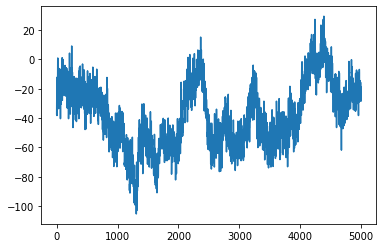

In [5]:
# plot data
pc_pymat = py_mat[0][0]
plt.plot(pc_pymat[15000:20000])

In [6]:
# furier transform
# s_pymat = pc_pymat[:72000000]
s_pymat = pc_pymat
#f, t, Zxx = signal.stft(x, fs, nperseg=1000)
# x = the signal (vector of samples) ; fs = sample rate ; nperseg = window (num of samples)
frequencies, segment_times, freq_magnitudes = signal.stft(s_pymat, 20000, nperseg=200000, noverlap = 180000)

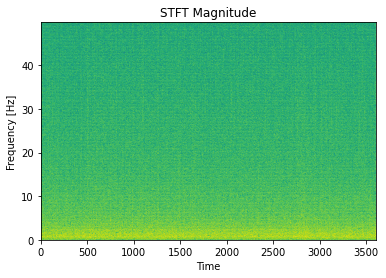

In [7]:
# segmentation and plot
plt.pcolormesh(segment_times[:], frequencies[:500], np.log(np.abs(freq_magnitudes[:500,:])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
# auto-correlation / cross-correlation in differante time window

#https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9
# https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/